# Linear and Logistic Regression

## Importing the libraries

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import seaborn as sns 

## Importing the dataset

In [2]:
data=pd.read_csv("HRV.csv")

## Dataset Preprocessing

In [3]:
data.head()

,male,age,currentSmoker,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4234 entries, 0 to 4233
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   male           4234 non-null   int64  
 1   age            4234 non-null   int64  
 2   currentSmoker  4234 non-null   int64  
 3   totChol        4184 non-null   float64
 4   sysBP          4234 non-null   float64
 5   diaBP          4234 non-null   float64
 6   BMI            4215 non-null   float64
 7   heartRate      4233 non-null   float64
 8   glucose        3847 non-null   float64
 9   TenYearCHD     4234 non-null   int64  
dtypes: float64(6), int64(4)
memory usage: 330.9 KB


In [5]:
data.isnull().sum()

male               0
age                0
currentSmoker      0
totChol           50
sysBP              0
diaBP              0
BMI               19
heartRate          1
glucose          387
TenYearCHD         0
dtype: int64

In [6]:
data.describe()

,male,age,currentSmoker,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4234.000000,4234.000000,4234.000000,4184.000000,4234.000000,4234.000000,4215.000000,4233.000000,3847.000000,4234.000000
mean,0.428909,49.583845,0.494095,236.723231,132.347780,82.886042,25.800624,75.882825,81.976085,0.151630
std,0.494979,8.575050,0.500024,44.608268,22.046338,11.911857,4.081183,12.031365,23.966195,0.358704
min,0.000000,32.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,1.000000,263.000000,144.000000,89.500000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [7]:
col_median=data['totChol'].median()
col_median
data['totChol'].fillna(col_median,inplace=True)

In [8]:
data.isnull().sum()

male               0
age                0
currentSmoker      0
totChol            0
sysBP              0
diaBP              0
BMI               19
heartRate          1
glucose          387
TenYearCHD         0
dtype: int64

In [9]:
col_BMI=data['BMI'].mean()
col_BMI
data['BMI'].fillna(col_BMI,inplace=True)

In [10]:
data.isnull().sum()

male               0
age                0
currentSmoker      0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          1
glucose          387
TenYearCHD         0
dtype: int64

In [11]:
col_heartRate=data['heartRate'].mean()
col_heartRate
data['heartRate'].fillna(col_heartRate,inplace=True)

In [12]:
data.isnull().sum()

male               0
age                0
currentSmoker      0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose          387
TenYearCHD         0
dtype: int64

In [13]:
col_glucose=data['glucose'].mean()
col_glucose
data['glucose'].fillna(col_glucose,inplace=True)

In [14]:
data.isnull().sum()

male             0
age              0
currentSmoker    0
totChol          0
sysBP            0
diaBP            0
BMI              0
heartRate        0
glucose          0
TenYearCHD       0
dtype: int64

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4234 entries, 0 to 4233
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   male           4234 non-null   int64  
 1   age            4234 non-null   int64  
 2   currentSmoker  4234 non-null   int64  
 3   totChol        4234 non-null   float64
 4   sysBP          4234 non-null   float64
 5   diaBP          4234 non-null   float64
 6   BMI            4234 non-null   float64
 7   heartRate      4234 non-null   float64
 8   glucose        4234 non-null   float64
 9   TenYearCHD     4234 non-null   int64  
dtypes: float64(6), int64(4)
memory usage: 330.9 KB


## A. Linear Regression - Create a model to predict the cholestrol level of a person

In [16]:
data.columns

Index(['male', 'age', 'currentSmoker', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

### Create independent and dependent variables to predict 

In [17]:
x = data[['male', 'age', 'currentSmoker', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']]
y = data['totChol']

## Splitting the dataset into the Training set and Test set

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=0)

## Training the Linear Regression model 

In [19]:
from sklearn.linear_model import LinearRegression

regressor=LinearRegression()

regressor.fit(x_train.values,y_train)

LinearRegression()

In [23]:
y_pred=regressor.predict(x_test.values)

## Model performance check- R Square and RMSE score

In [24]:
from sklearn.metrics import mean_squared_error, r2_score
import math

In [25]:
print(F"RMSE: {math.sqrt(mean_squared_error(y_test,y_pred)):.2f}")

RMSE: 45.22


In [26]:
print(f"R-square: {r2_score(y_test,y_pred):.2f}")

R-square: 0.06


## Predicting new results where the actual results are given
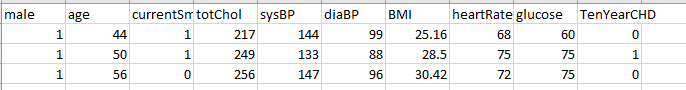

In [27]:
# case 1 actual 217
regressor.predict([[1,44,1,144,99,25.16,68,60,0]])

array([229.44479424])

In [28]:
# case 2 actual 249
regressor.predict([[1,50,1,133,88,28.5,75,75,1]])

array([236.94760009])

In [29]:
# case 3 actual 256
regressor.predict([[1,56,0,147,96,30.42,72,75,0]])

array([245.17293619])

## B. Logistic Regression - Create a model to predict the 10 year risk of coronary heart disease CHD of a person

In [31]:
data.columns

Index(['male', 'age', 'currentSmoker', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

### Create independent and dependent variables to predict

In [35]:
x=data[['male', 'age', 'currentSmoker', 'totChol', 'sysBP', 'diaBP', 'BMI',
       'heartRate', 'glucose']]

In [36]:
y=data['TenYearCHD']

## Splitting the dataset into the Training set and Test set

In [37]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=0)

## Training the Logistic Regression model 

In [38]:
from sklearn.linear_model import LogisticRegression

classifier=LogisticRegression()

classifier.fit(x_train.values,y_train)

C:\Users\alexs\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
y_pred=classifier.predict(x_test.values)

### Model Performance check using Confusion matrix, Confusion matrix display and classification report

In [40]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

In [41]:
y_test

3554    0
410     0
3868    1
1487    0
840     1
       ..
3829    1
2527    0
349     0
2100    0
2842    1
Name: TenYearCHD, Length: 1398, dtype: int64

In [42]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [43]:
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[1179    3]
 [ 206   10]]


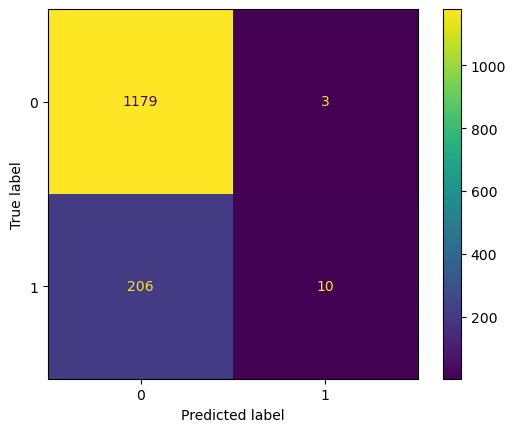

In [44]:
disp= ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
disp.plot()
plt.show()

### Discuss the results

In [45]:
#TN = No CHD predicted correctly (8)
# TP = CHD predicted correctly (1179)
#FP = Actually no CHD but predicted yes (208)
# FN = Actually CHD predicted no CHD (3)

## Predicting new results where the actual results are given
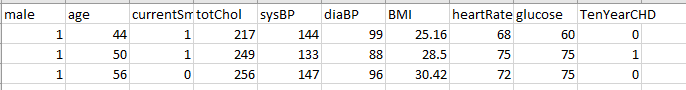

In [46]:
classifier.predict([[1,44,1,217,144,89,25.16,68,60]])

array([0], dtype=int64)

In [47]:
classifier.predict([[1,50,1,249,133,88,28.5,75,75]])

array([0], dtype=int64)

In [48]:
classifier.predict([[1,56,0,256,147,96,30.42,71,75]])

array([0], dtype=int64)

### Summary

In [49]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1182
           1       0.77      0.05      0.09       216

    accuracy                           0.85      1398
   macro avg       0.81      0.52      0.50      1398
weighted avg       0.84      0.85      0.79      1398



### The dataset exhibits an imbalance, with a higher frequency of 0's compared to 1's, complicating the task of predicting outcomes. In my preprocessing steps, I opted for the mean as a central measure due to the skewed nature of the dataset. Despite the apparent skewness, the mean closely aligns with the median, justifying its use. The linear model has a relatively low R-squared value (0.06), indicating it explains only a small portion of the variance in the dependent variable. The Root Mean Square Error (RMSE) is 45.22, suggesting a moderate level of prediction error. Overall, the model shows room for improvement in explaining and predicting the data.
